# Обобщени полиноми. Интерполиране с обобщени полиноми

### Задача 1

В таблицата са дадени данни за развитието на бактериална популация

|  t, h  |  1 | 2 | 3 | 4 | 5 |
| --- | --- | --- | --- | --- | --- | 
| бр. клетки (x1000)|  1 |12| 110 | 1037 | 12218 |

Да се намери подходяща функция, която интерполира данните. Да се начертаят данните и графиката на функцията в една координатна система.

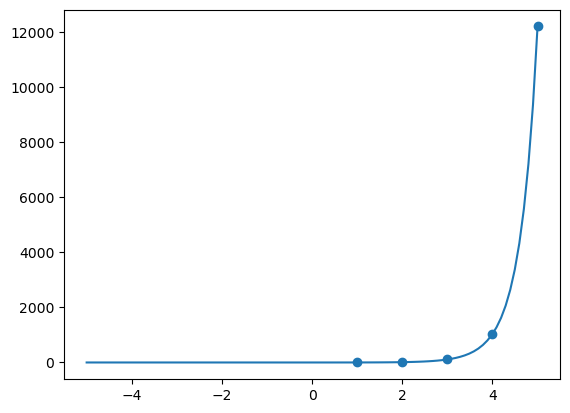

In [5]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
n = 5
A = np.zeros([n, n])
nodes = np.array([1, 2, 3, 4, 5])
values = np.array([1, 12, 110, 1037, 12218])

for i in range(0, 5):
    for j in range(0, 5):
        A[i][j] = np.exp(j*nodes[i])

x = np.linspace(-5, 5, 100)
a = np.linalg.solve(A, values)

def p(x):
    p = 0
    for i in range(0, 5):
        p += a[i] * np.exp(x*i)
    return p

plt.scatter(nodes, values)
plt.plot(x, p(x))


### Задача 2

Пациент приема 5 mg/L от лекарство в момент t=0. В таблицата е описана промяната на концентрацията на лекарството в кръвта на пациента часове след приемането му
|  t, h  |  1 | 2 | 3 | 4 |
| --- | --- | --- | --- | --- | 
| concentration, mg/L|  1.571 |1.158| 1.049 | 1.018 |

Да се построи интерполационен полином по подходящ базис, който описва данните. Начертайте получения полином и съответните данни в една координатна система.

[ 1.00252689  0.7908906   2.99029896 -2.55432276]


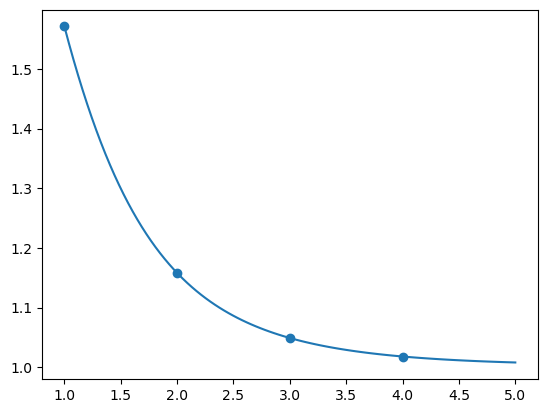

In [51]:
values = np.array([ 1.571,1.158,1.049,1.018])
nodes = np.array([1, 2, 3, 4])
n = 4
x = np.linspace(1, 5, 100)
# A1 = np.zeros([n, n])
A = np.zeros([n,n])
# 1 nachin
# for i in range(0, 4):
#     for j in range(0, 4):
#         A1[i][j] = np.exp(- nodes[i] * j)

def basis_functions(x):
    return np.array([1, np.exp(-x), np.exp(-2*x), np.exp(-3*x)])
                    
for i in range(0, 4):
    A[i] = basis_functions(nodes[i])
    
a1 = np.linalg.solve(A, values)
print(a1)

def f(x):
    f = 0
    for i in range(0,4):
        f += a1[i] * np.exp(-i*x) 
    return f

plt.plot(x, f(x))
plt.scatter(nodes, values)
# plt.scatter(nodes, values)

### Задача 3


Дадени са данни за брой часове слънчева светлина, където x е денят от годината. Да се намери функция, която моделира броя часове слънчева светлина.

|  x|  0 | 61 | 152 | 243 | 334 |
| --- | --- | --- | --- | --- |---|
| часове слънчева светлина|  9 |11| 15 | 13 | 9.5 |

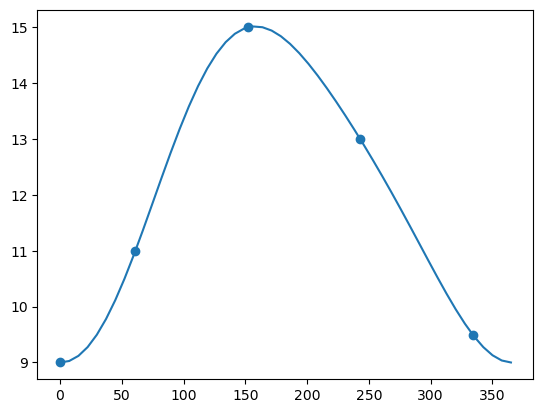

In [68]:
def base_functions(x):
    return np.array([1, np.sin(x), np.cos(x), np.sin(2*x), np.cos(2*x)])
    
prev_nodes = [0, 61, 152, 243, 334]

nodes = np.array([prev_nodes[i] * 2* np.pi/365 for i in range(0,5)])
values = np.array([9,11,15, 13, 9.5])
n = 5
A = np.zeros([n, n])

for i in range(0, 5):
    A[i] = base_functions(nodes[i])

a = np.linalg.solve(A, values)

x = np.linspace(0, 365)
def g(x):
    return a[0] + a[1]*np.sin(x) + a[2]*np.cos(x) + a[3] * np.sin(2*x) + a[4] * np.cos(2*x)
    # g = a[0]
    # for i in range(1, n/2+1):
    #     g += a[i] * np.sin(x * i)
    #     g += a[i] * mp.cos(x*i)
    # return g
    
plt.plot(x, g(np.pi * 2*x/365))
plt.scatter(prev_nodes, values)


### Задача 4

В таблицата са дадени данни от сигнал на акселерометър в 5 момента от време:

|  t, ms  |  1 | 1.5 | 3 | 4 | 6 |
| --- | --- | --- | --- | --- | --- | 
| ускорение, $m/s^2$|  0 |1| 1.2 | 4 | 2 |

Да се намери обобщен полином по подходящ базис, който интерполира тези данни, ако е известно, че сигналът се описва от периодична функция с период а) $T=2\pi$; б) $T=8$.
Да се начертае графиката на полинома в интервала $[0, 4 \pi]$ заедно с точките в една координатна система във всеки от случаите.

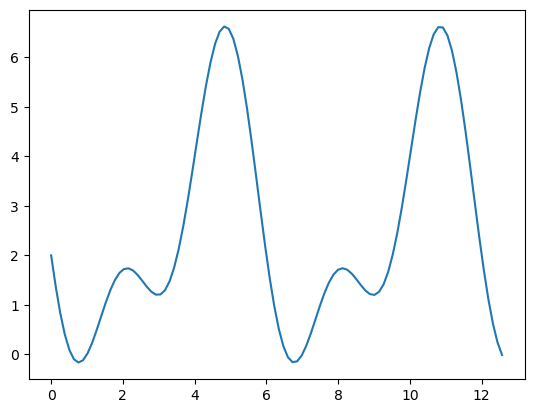

In [8]:
import numpy as np
prev_nodes =[1,1.5,3,4,6]
nodes = np.array([item * 2*np.pi/6 for item in prev_nodes])
values = np.array([0, 1,1.2,4,2])
def base_functions(x):
    return np.array([1, np.sin(x), np.cos(x), np.sin(2*x), np.cos(2*x)])
    
n=5
A = np.zeros([n,n])

for i in range(0,5):
    A[i] = base_functions(nodes[i])

a = np.linalg.solve(A, values)
def g(x):
    return a[0] + a[1]*np.sin(x) + a[2]*np.cos(x) + a[3] * np.sin(2*x) + a[4] * np.cos(2*x)
x=np.linspace(0, 4*np.pi, 100)
plt.plot(x, g(x *2* np.pi/6))
plt.show()





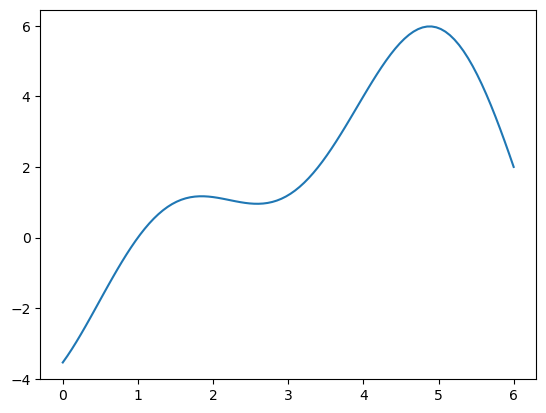

In [10]:
prev_nodes =[1,1.5,3,4,6]
nodes = np.array([item * 2*np.pi/8 for item in prev_nodes])
values = np.array([0, 1,1.2,4,2])
def base_functions(x):
    return np.array([1, np.sin(x), np.cos(x), np.sin(2*x), np.cos(2*x)])
n=5
A = np.zeros([n,n])

for i in range(0,5):
    A[i] = base_functions(nodes[i])

a = np.linalg.solve(A, values)
def g(x):
    return a[0] + a[1]*np.sin(x) + a[2]*np.cos(x) + a[3] * np.sin(2*x) + a[4] * np.cos(2*x)
x=np.linspace(0, 6, 100)
plt.plot(x, g(x *2* np.pi/8))
plt.show()

### Задача 5


В таблицата са дадени данни за средните месечни количества слънчева радиация на територията на България, като лиспват данни за м. август

|  t, месец  |  Я | Ф | М | А | М | Ю | Ю | A | С | O | Н | Д |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| слънчева радиация, $W/m^2$|45.9| 78.2 | 123.5| 172.6| 223.5| 255.3| 286.0| | 183.9| 116.2 | 57.8| 37.7|

Данните са осреднени на 30 дни, т.е. можем да считаме, че разстоянието между измерванията в два съседни месеца е 30. Като се има предвид това, както и факта, че разглежданият процес е с период 365 дни, да се намери обобщен полином по подходящ базис, който описва данните в таблицата. Като се използва така намереният полином, да се пресметне приближено количеството слънчева радиация, съответстващо на м. август. Да се сравни с действителната стойност - $257.9 W/m^2$.

In [ ]:
nodes = np.array([0, 30, 60, 90, 120,150, 180, 240, 270, 300,330)
values = np.array([item * 2*np.pi/365 for item in [45.9, 78.2, 123.5, 172.6, 223.5, 255.3, 286.0, 183.9, 116.2 , 57.8, 37.7])

def base_funcs_prim(x):
    return np.array([1, np.sin(x), np.cos(x), np.sin(2*x), np.cos(2*x), np.sin(3*x),np.cos(3*x), np.sin(4*x),np.cos(4*x), np.sin(5*x),np.cos(5*x)]
A = np.zeros([n, n])
for i in range(0, 12):
    A[i] = base_func_prim(nodes[i])
a = np.linalg.solve(A, values)
x=np.linspace(0, 365, 100)
def g(x):
    return a[0] + a[1]*np.sin(x) + a[2]*np.cos(x) + a[3] * np.sin(2*x) + a[4] * np.cos(2*x)  + a[5] * np.sin(3*x) + a[6] *np.cos(3*x) + a[7]* np.sin(4*x) + a[8] *np.cos(4*x) a[9]* np.sin(5*x)+a[10]*np.cos(5*x)

plt.plot(x, g(x*2*np.pi/365))
plt.show()